In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
data=pd.read_csv('DOGE-USD.csv')

In [29]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.shape

(1761, 7)

In [31]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [32]:
#list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

Open 0.0006  % missing values
High 0.0006  % missing values
Low 0.0006  % missing values
Close 0.0006  % missing values
Adj Close 0.0006  % missing values
Volume 0.0006  % missing values


Text(0.5, 1.0, 'Date vs Volume')

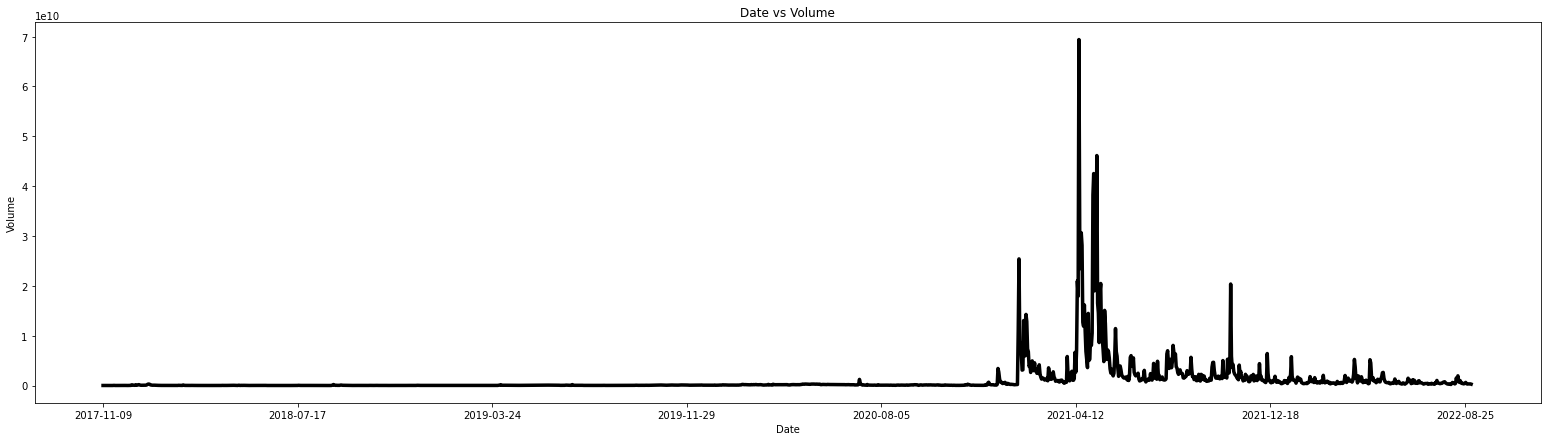

In [33]:
plt.figure(figsize=(27,7))
data.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

Text(0.5, 1.0, 'Date vs Volume of 2021')

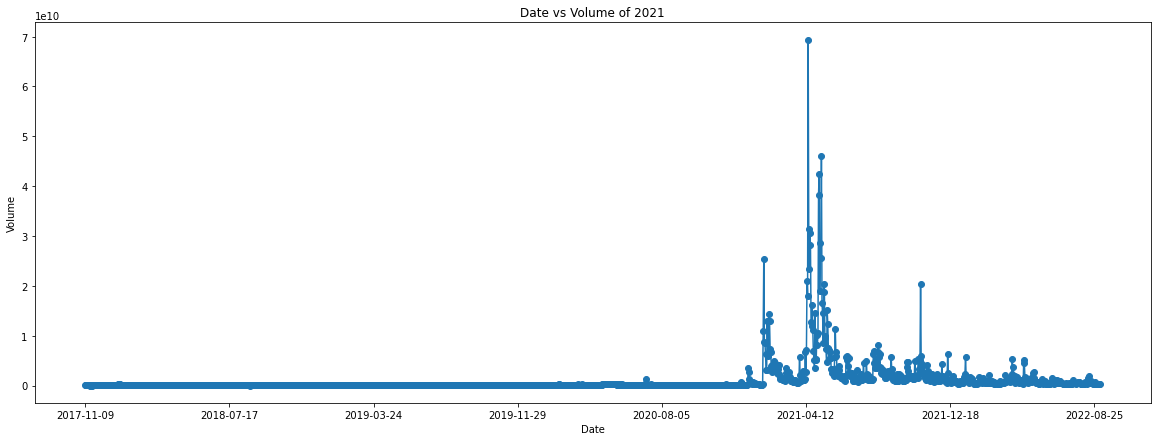

In [34]:
plt.figure(figsize=(20,7))
data.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2021")

Text(0.5, 1.0, 'Date vs Open of 2021')

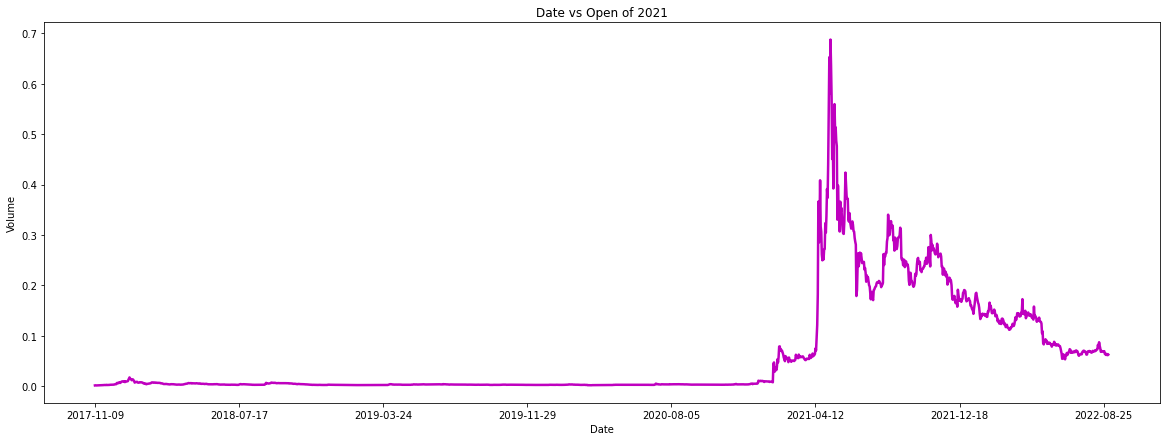

In [35]:
plt.figure(figsize=(20,7))
data.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2021")

Text(0.5, 1.0, 'Date vs High of 2021')

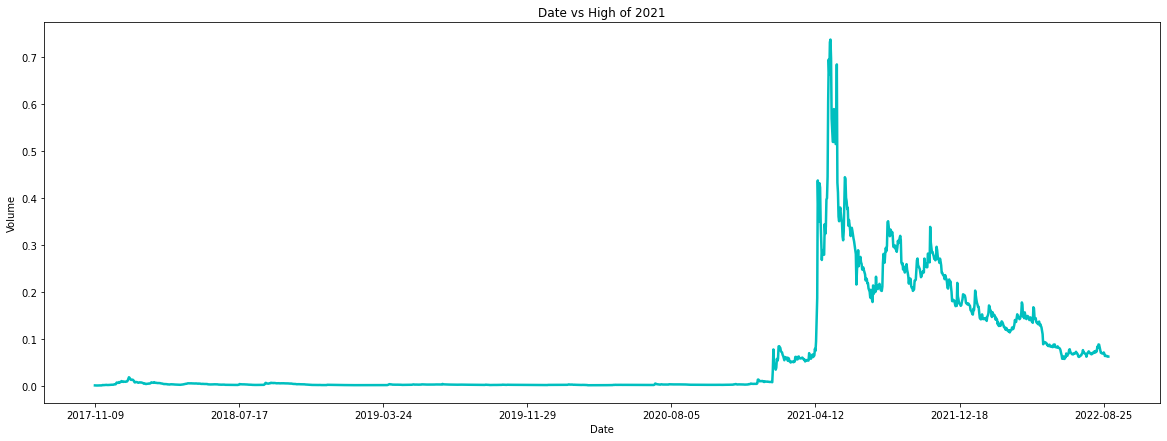

In [36]:
plt.figure(figsize=(20,7))
data.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2021")

Text(0.5, 1.0, 'Date vs Low of 2021')

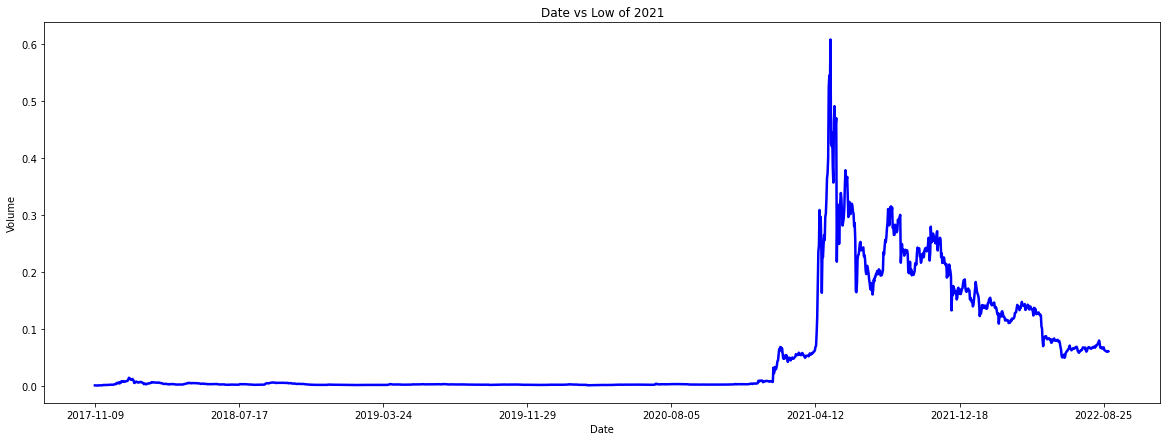

In [37]:
plt.figure(figsize=(20,7))
data.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2021")

Text(0.5, 1.0, 'Date vs Close of 2021')

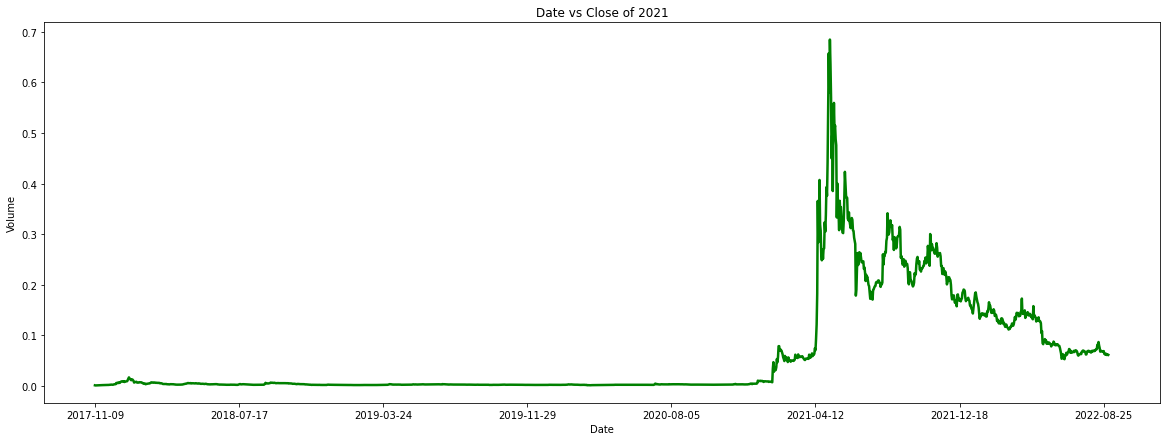

In [38]:
plt.figure(figsize=(20,7))
data.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

Text(0.5, 1.0, 'Date vs Adj Close of 2021')

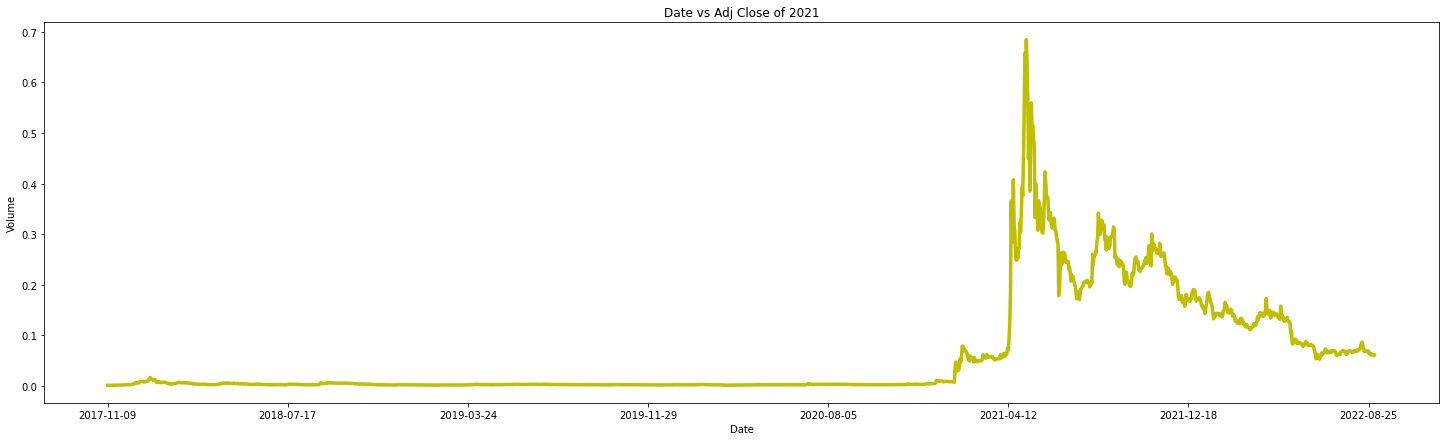

In [39]:
plt.figure(figsize=(25,7))
data.groupby('Date')['Adj Close'].mean().plot(linewidth = 3.5, color = 'y')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Adj Close of 2021")

<AxesSubplot:>

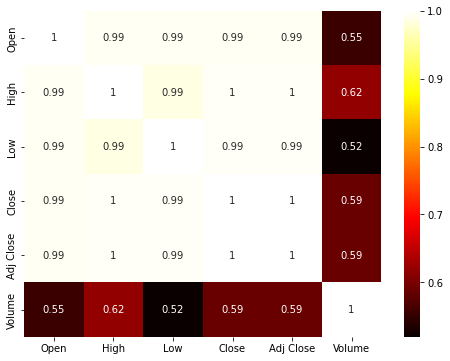

In [78]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr() , cmap = 'hot', annot = True)

In [41]:
new_data =pd.read_csv('DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')

In [42]:
X = new_data.drop('High', axis=1)
Y = new_data['High']

print('Shape of X = ', X.shape)
print('Shape of Y = ', Y.shape)

Shape of X =  (1761, 4)
Shape of Y =  (1761,)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of Y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of Y_test = ', Y_test.shape)

Shape of X_train =  (1232, 4)
Shape of Y_train =  (1232,)
Shape of X_test =  (529, 4)
Shape of Y_test =  (529,)


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [46]:
regressor.score(X_test, Y_test)

0.997078694608016

In [47]:
Y_pred = regressor.predict(X_test)

In [48]:
ds = pd.DataFrame()
ds['High']=Y_test

In [49]:
ds['Prediction']=Y_pred
ds.head(11)

,High,Prediction
966,0.002382,0.002376
1524,0.164621,0.155144
1580,0.119724,0.118811
816,0.002517,0.002482
1026,0.003308,0.003331
1007,0.003534,0.003591
1425,0.247924,0.248289
1517,0.172339,0.174028
1419,0.202579,0.207010
1531,0.173790,0.173952


<AxesSubplot:>

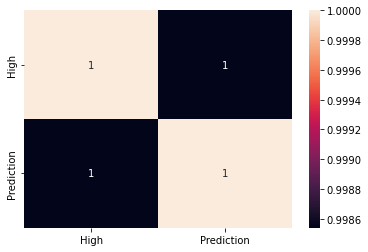

In [50]:
sns.heatmap(ds.corr(), annot = True)

In [66]:
X = new_data.drop('Volume', axis=1)
Y = new_data['Volume']

print('Shape of X = ', X.shape)
print('Shape of Y = ', Y.shape)

Shape of X =  (1761, 4)
Shape of Y =  (1761,)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of Y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of Y_test = ', Y_test.shape)

Shape of X_train =  (1232, 4)
Shape of Y_train =  (1232,)
Shape of X_test =  (529, 4)
Shape of Y_test =  (529,)


In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [70]:
regressor.score(X_test, Y_test)

0.6006665518877472

In [71]:
Y_pred = regressor.predict(X_test)

In [74]:
df3 = pd.DataFrame()
df3['Volume']=Y_test

In [75]:
df3['Prediction']=Y_pred
df3.head(11)

,Volume,Prediction
966,1.107891e+08,9.542132e+07
1524,1.628448e+09,2.083407e+09
1580,4.914143e+08,4.398783e+08
816,7.885663e+07,1.261694e+08
1026,8.536976e+07,6.647066e+07
1007,7.086588e+07,4.101997e+07
1425,3.684051e+09,1.667708e+09
1517,5.419229e+08,7.077665e+08
1419,8.663012e+08,1.160711e+09
1531,9.796934e+08,8.861899e+08


<AxesSubplot:>

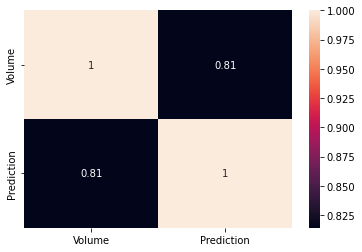

In [77]:
sns.heatmap(df3.corr(), annot = True)